In [170]:
import numpy as np
import cv2 as cv2
from matplotlib import pyplot as plt

In [171]:
image = cv2.imread('img2.bmp', 0)[570:1280,850:1700]
image = cv2.resize(image, (2000,2000), interpolation = cv2.INTER_AREA)

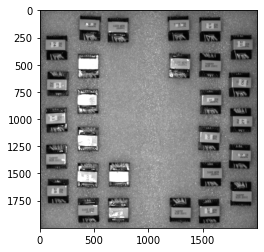

In [172]:
plt.imshow(image, cmap = 'gray')

In [173]:
gray = cv2.bilateralFilter(image, 11, 15, 15)

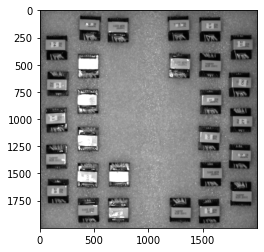

In [174]:
plt.imshow(gray, cmap = 'gray')

In [175]:
kernel = np.ones((7, 7), np.uint8)
gray_dilate = cv2.dilate(gray, kernel, iterations=3)

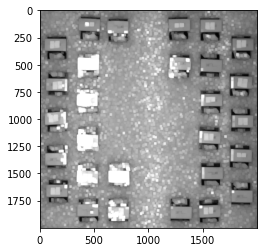

In [176]:
plt.imshow(gray_dilate, cmap = 'gray')

In [177]:
threshold = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
thresh = cv2.threshold(gray, 0, 255, threshold)[1]
cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
print(len(cnts))

175


In [178]:
thresh_dilate = cv2.threshold(gray_dilate, 0, 255, threshold)[1]
cnts_dilate, hierarchy_dilate = cv2.findContours(thresh_dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_dilate = sorted(cnts_dilate, key=cv2.contourArea, reverse=True)
print(len(cnts_dilate))

174


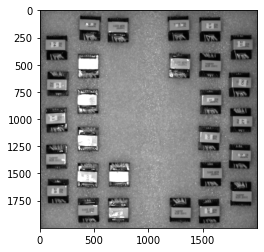

In [179]:
plt.imshow(gray, cmap = 'gray')

In [180]:
image = cv2.imread('img2.bmp')[570:1280,850:1700]
image = cv2.resize(image, (2000,2000), interpolation = cv2.INTER_AREA)

In [181]:
# for i in range(1):
#     rect = cv2.minAreaRect(cnts[i])
#     box = np.int0(cv2.boxPoints(rect))
#     cv2.drawContours(image, [box], 0, (0,255,0), 2)

#     rect_ = cv2.minAreaRect(cnts_dilate[i])
#     box_ = np.int0(cv2.boxPoints(rect_))
#     M = cv2.moments(box_)
#     if M['m00'] != 0:
#         cx = int(M['m10']/M['m00'])
#         cy = int(M['m01']/M['m00'])
#         # cv2.drawContours(image, [box_], 0, (0,255,0), 5)
#         cv2.circle(image, (cx, cy), 7, (0, 0, 255), -1)
#         cv2.putText(image, "center", (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
#     print(f"x: {cx} y: {cy}")

In [182]:
for i in range(20):
    rect = cv2.minAreaRect(cnts[i])
    box = np.int0(cv2.boxPoints(rect))
    cv2.drawContours(image, [box], 0, (0,255,0), 5)

    # rect_ = cv2.minAreaRect(cnts_dilate[i])
    # box_ = np.int0(cv2.boxPoints(rect_))
    M = cv2.moments(box)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        # cv2.drawContours(image, [box_], 0, (0,255,0), 5)
        cv2.circle(image, (cx, cy), 10, (0, 0, 255), -1)
        # cv2.putText(image, "center",(cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)
    print(f"x: {cx} y: {cy}")

x: 1862 y: 813
x: 133 y: 430
x: 1868 y: 1770
x: 1568 y: 157
x: 1279 y: 147
x: 1570 y: 502
x: 137 y: 1007
x: 137 y: 1346
x: 1557 y: 1846
x: 457 y: 151
x: 1582 y: 1503
x: 1295 y: 1838
x: 1576 y: 844
x: 145 y: 1659
x: 444 y: 1836
x: 1290 y: 505
x: 715 y: 253
x: 1549 y: 1256
x: 1556 y: 1087
x: 719 y: 1764


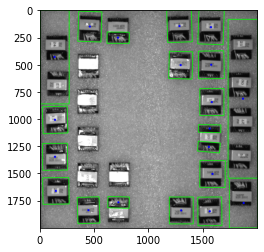

In [183]:
plt.imshow(image, cmap="gray")